In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

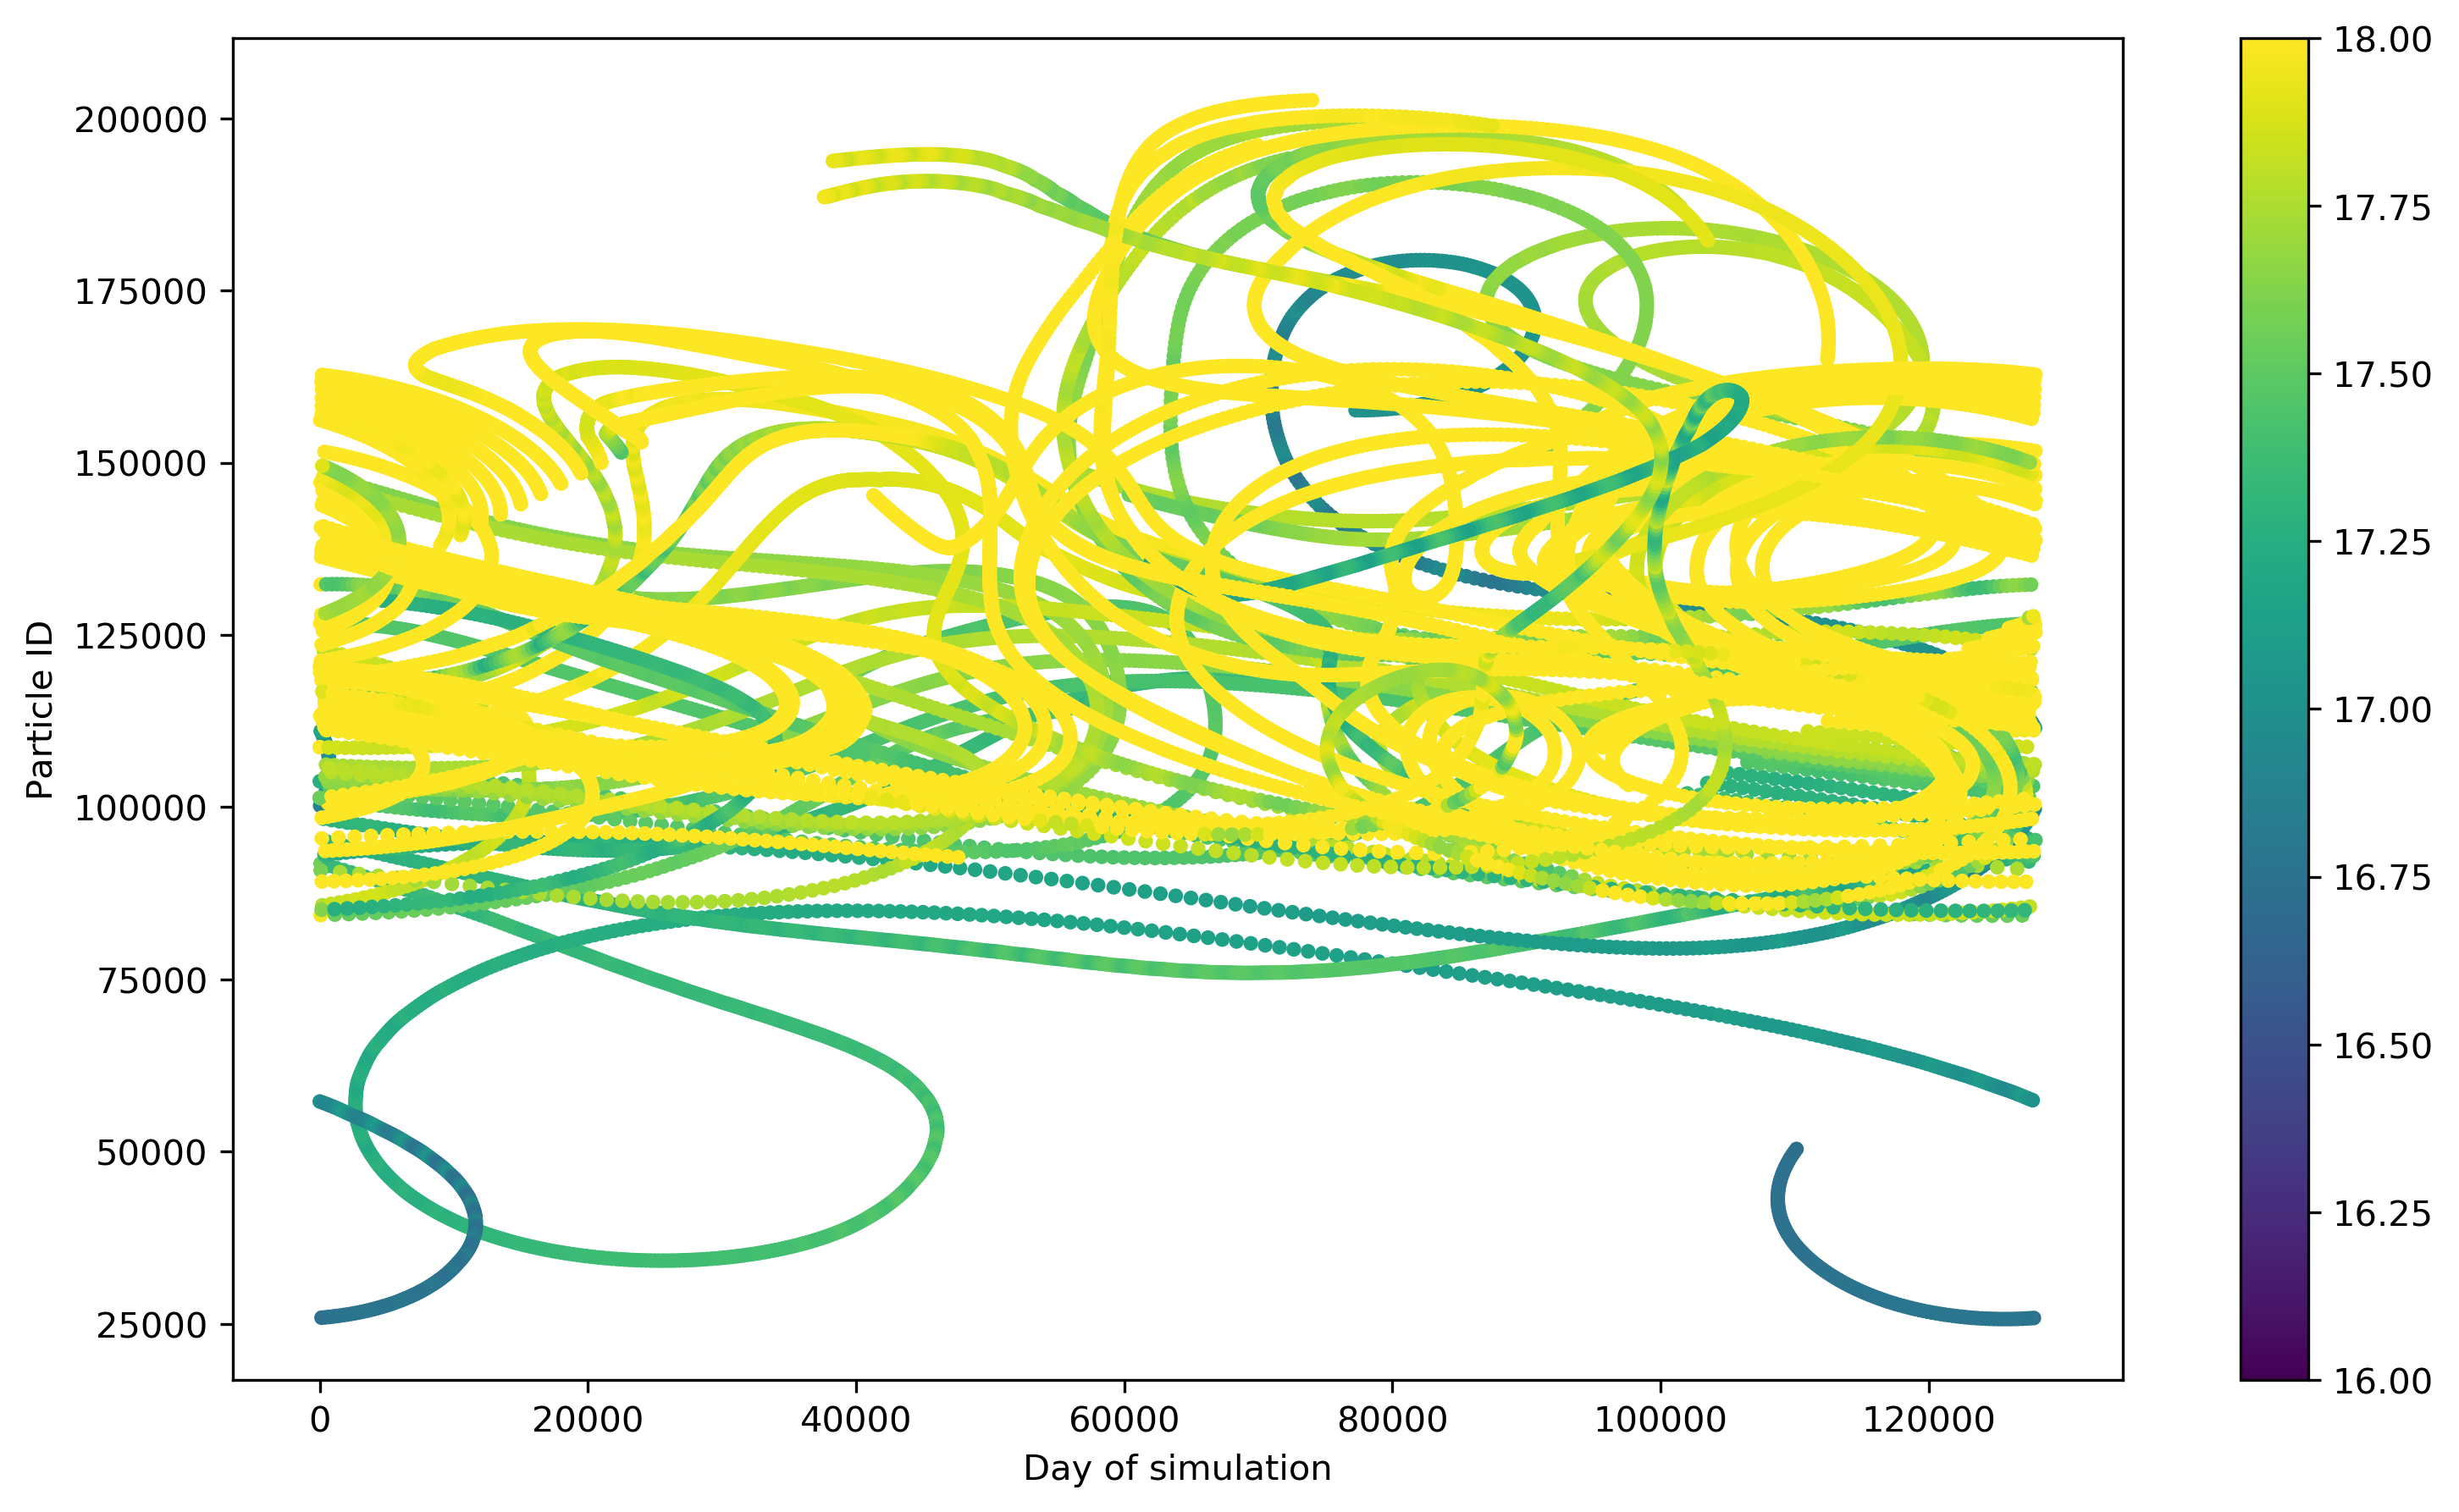

In [36]:
# import trajectory data

indir = '../data/particle_trajectories/'
db = 'particles_forward.db'
indb = '%s%s'% (indir, db)

conn = sqlite3.connect(indb)
c = conn.cursor()

xy = pd.read_sql_query("select ID, DOY, x, y, z, temperature from particles;", conn)
# print xy

conn.close()

palette = plt.get_cmap('RdYlBu_r', 40)

fig1 = plt.figure(1, figsize=(12,7), dpi = 300)
for n in range(30):
    nn = n+1
    subset = xy[xy['ID']==n]
    plt.scatter(subset['x'], subset['y'], s= 10, c = subset['temperature'], vmin = 16, vmax = 18)
#     plt.plot(subset['DOY'],np.ones(len(subset))*nn, c = 'k', alpha = 0.5, zorder = 1)
#     plt.scatter(subset['DOY'],np.ones(len(subset))*nn,s = 20, c = subset['temperature'], vmin = 16, vmax = 20, cmap = palette)

plt.xlabel('Day of simulation')
plt.ylabel('Particle ID')
plt.colorbar()
plt.show()

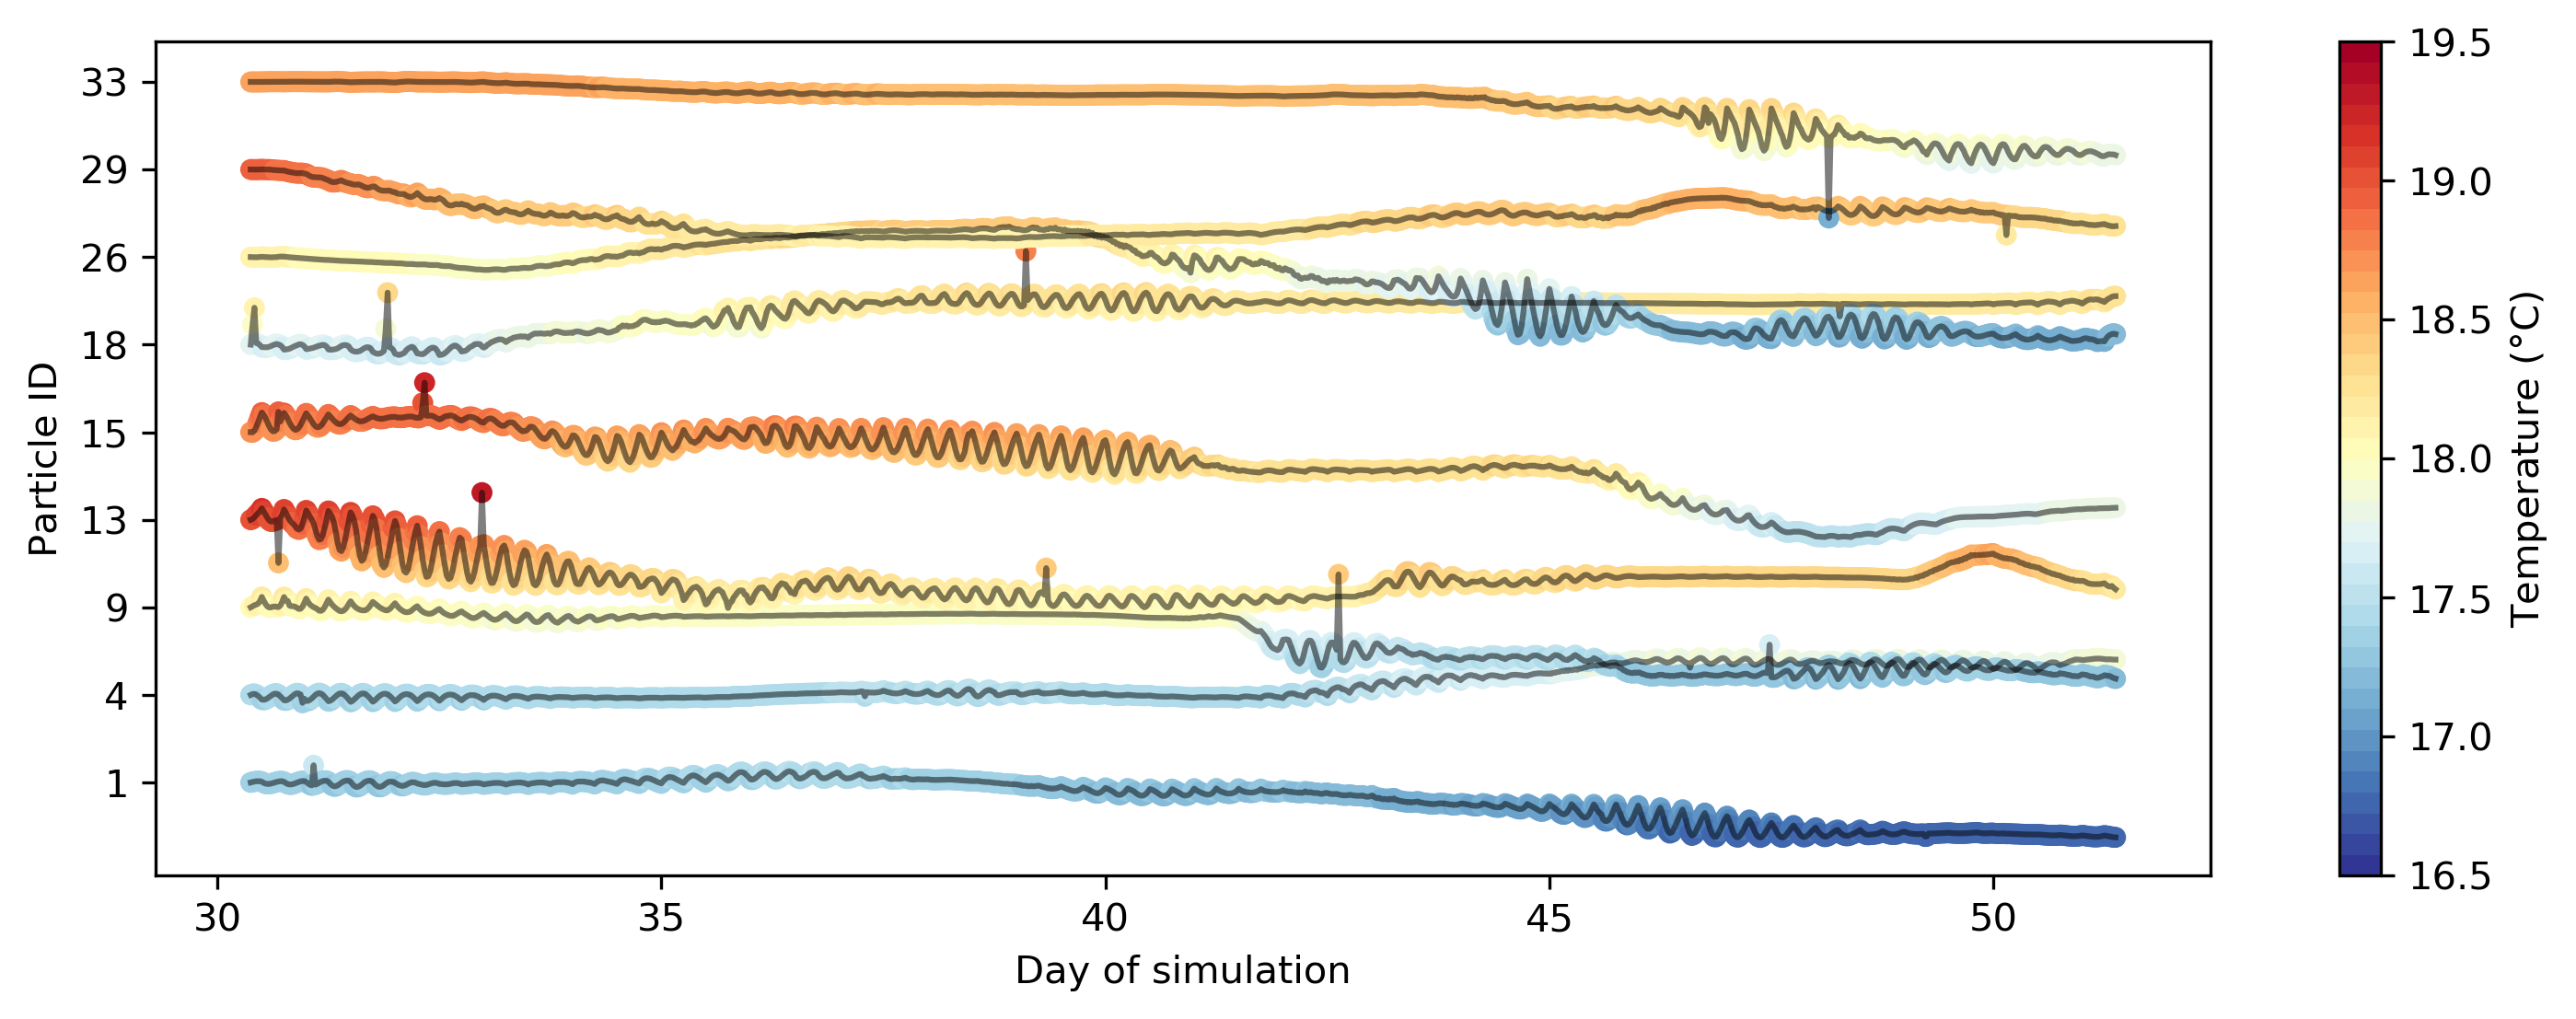

In [70]:
fig2 = plt.figure(2, figsize=(12,4), dpi = 300)
nn = 0
for n in [1,4,9,13,15,18,26,29,33]:
    nn += 1
#     print nn
    subset = xy[xy['ID']==n].reset_index()
#     plt.scatter(subset['x'], subset['y'], s= 10, c = subset['temperature'], vmin = 16, vmax = 18)
    plt.plot(subset['DOY'],(subset['temperature']-subset['temperature'][0])+nn, c = 'k', alpha = 0.5, zorder = 1)
    plt.scatter(subset['DOY'],(subset['temperature']-subset['temperature'][0])+nn,s = 20, c = subset['temperature'], vmin = 16.5, vmax = 19.5, cmap = palette)

plt.xlabel('Day of simulation')
plt.yticks(range(1,10,1), [1,4,9,13,15,18,26,29,33])
plt.ylabel('Particle ID')
cbar = plt.colorbar(label = 'Temperature ($\degree$C)')
plt.show()

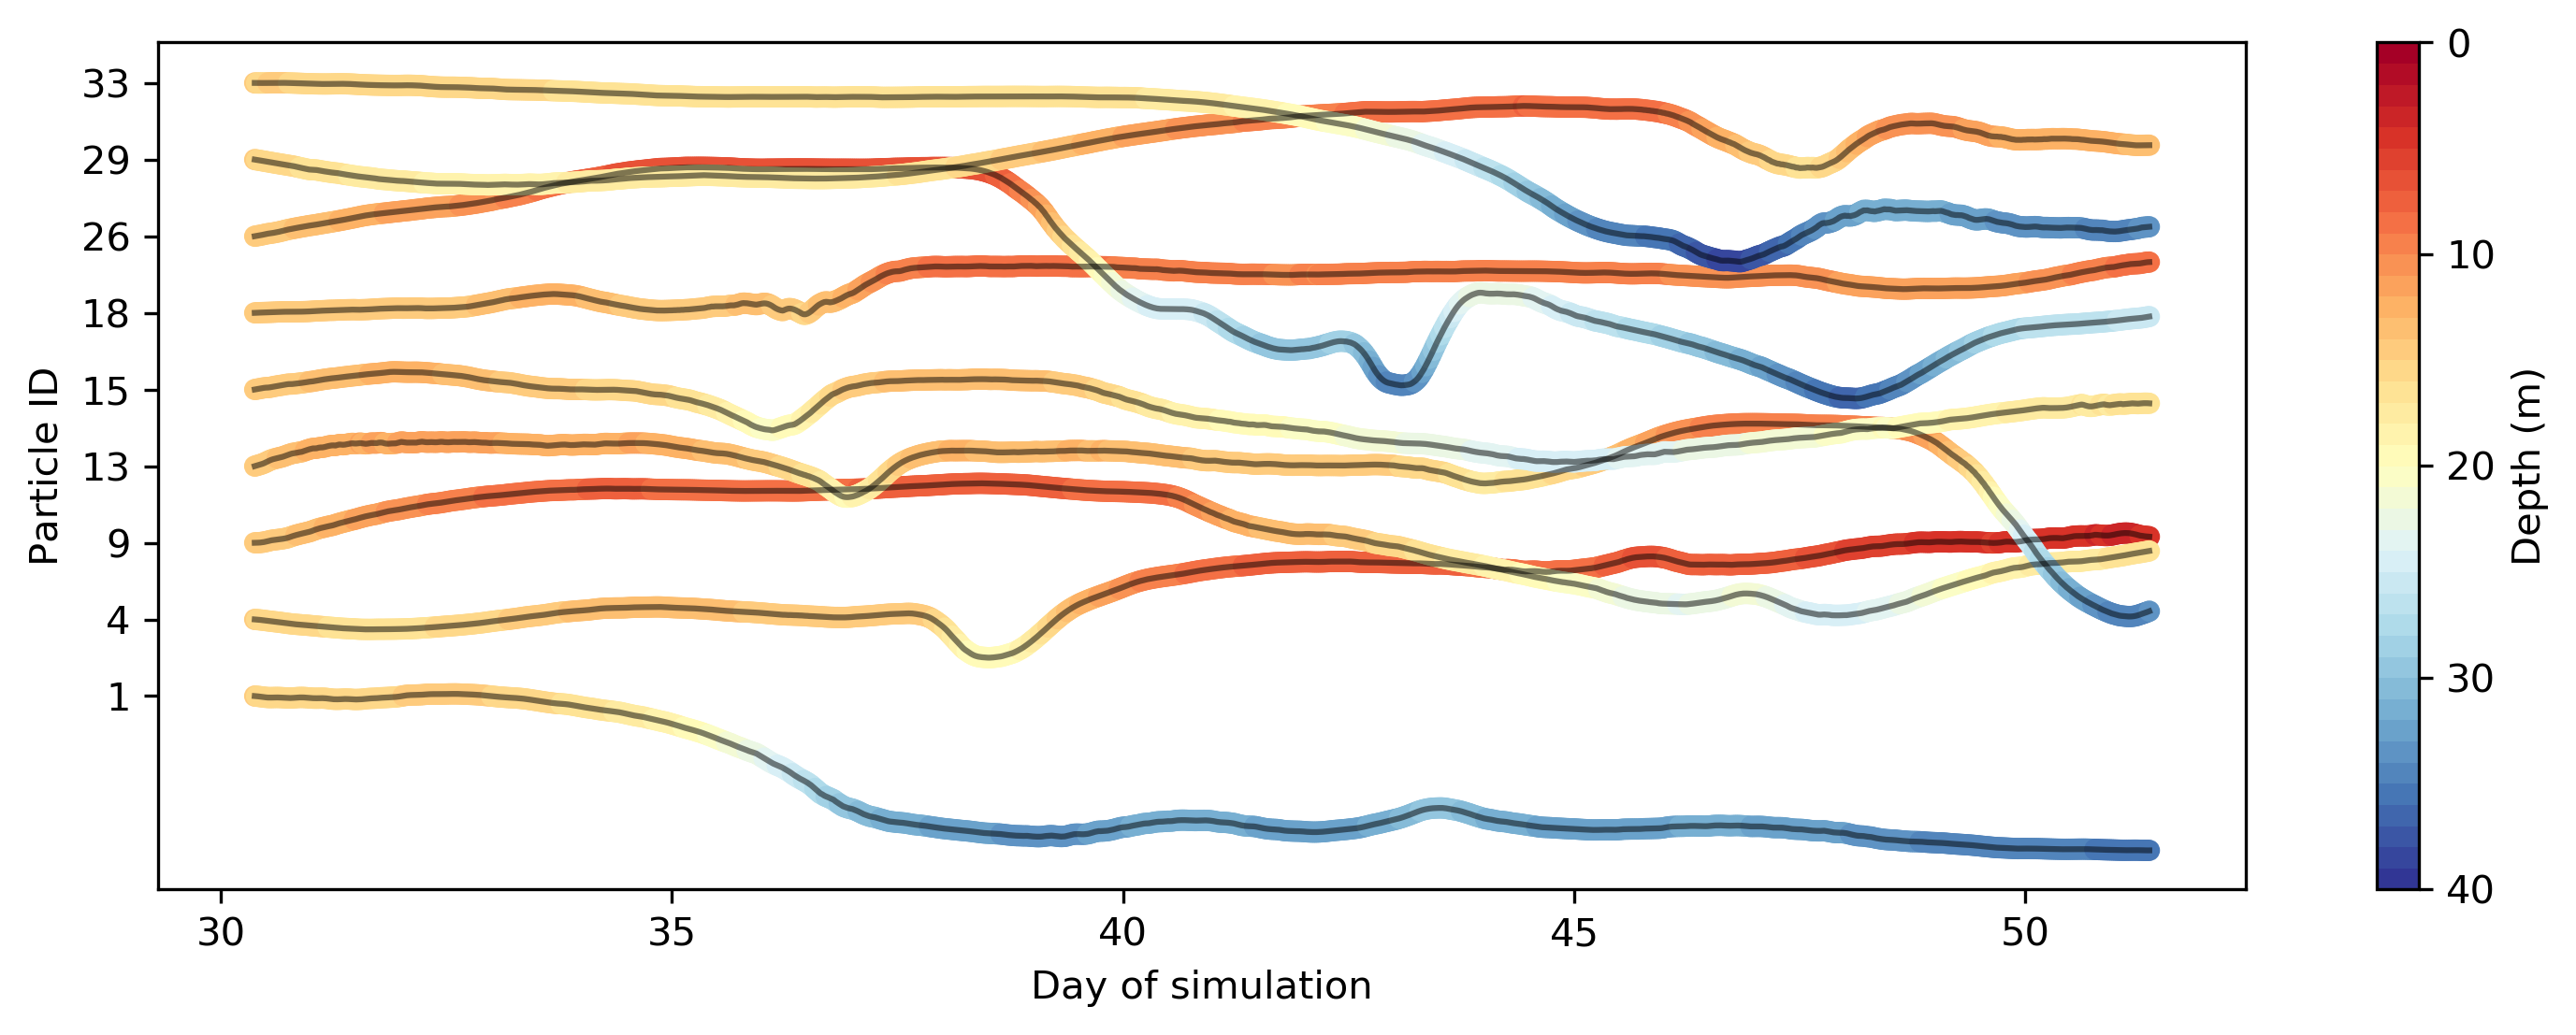

In [69]:
fig3 = plt.figure(3, figsize=(12,4), dpi = 300)
nn = 0
for n in [1,4,9,13,15,18,26,29,33]:
    nn += 1
#     print nn
    subset = xy[xy['ID']==n].reset_index()
#     plt.scatter(subset['x'], subset['y'], s= 10, c = subset['temperature'], vmin = 16, vmax = 18)
    plt.plot(subset['DOY'],((subset['z']-subset['z'][0])/10)+nn, c = 'k', alpha = 0.5, zorder = 1)
    plt.scatter(subset['DOY'],((subset['z']-subset['z'][0])/10)+nn,s = 20, c = subset['z'], vmin = -40, vmax = 0, cmap = palette)

plt.xlabel('Day of simulation')
plt.yticks(range(1,10,1), [1,4,9,13,15,18,26,29,33])
plt.ylabel('Particle ID')
cbar = plt.colorbar(label = 'Depth (m)', ticks = [-40, -30, -20, -10, 0])
cbar.set_ticklabels([40, 30, 20, 10, 0])
plt.show()